## Loading data and libriries

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data from the Furman Center covers 10 variables on housing from 2009 (from 2000 for some of them) for Brooklyn and 19 so-called sub-borough areas (Williamsburg/Greenpoint, Bushwick, Park Slope/Carroll Gardens, etc.).\
Data dictionary can be found in a separate sheet of the Excel file.

In [308]:
# Load the data
furman_data = pd.read_excel('Data/neighorhood_indicators.xlsx', sheet_name='data')

In [309]:
# Show rows for Brooklyn only
furman_data.head(36)

,region_id,region_name,region_type,year,gross_rent_0_1beds,gross_rent_2_3beds,median_household_income,median_household_income_own,median_household_income_rent,hpi,...,population_density,crime_viol_rt,pop_pov_pct,pop_pov_u18_pct,pop_discon_youth_pct,pop_race_asian_pct,pop_race_black_pct,pop_race_hisp_pct,pop_race_white_pct,pop_race_div_idx
0,300,Brooklyn,Borough,2000,NaN,NaN,56310.0,NaN,NaN,100.0,...,NaN,9.1,0.251,NaN,NaN,0.075,0.344,0.198,0.347,0.72
1,300,Brooklyn,Borough,2001,NaN,NaN,NaN,NaN,NaN,112.8,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,300,Brooklyn,Borough,2002,NaN,NaN,NaN,NaN,NaN,122.4,...,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,300,Brooklyn,Borough,2003,NaN,NaN,NaN,NaN,NaN,146.3,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300,Brooklyn,Borough,2004,NaN,NaN,NaN,NaN,NaN,174.0,...,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,300,Brooklyn,Borough,2005,NaN,NaN,46220.0,77360.0,37160.0,203.4,...,NaN,6.4,0.224,0.305,NaN,0.090,0.342,0.199,0.354,0.71
6,300,Brooklyn,Borough,2005-2009,1190.0,1400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.085,NaN,NaN,NaN,NaN,NaN
7,300,Brooklyn,Borough,2006,NaN,NaN,56760.0,96260.0,41840.0,231.5,...,36.2,5.9,0.226,0.323,NaN,0.090,0.336,0.198,0.358,0.71
8,300,Brooklyn,Borough,2006-2010,1220.0,1410.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.092,NaN,NaN,NaN,NaN,NaN
9,300,Brooklyn,Borough,2007,NaN,NaN,56590.0,96030.0,44730.0,226.3,...,36.4,5.6,0.219,0.317,NaN,0.089,0.334,0.195,0.364,0.71


In [310]:
furman_data['region_name'].unique()

array(['Brooklyn', 'Williamsburg/Greenpoint',
       'Brooklyn Heights/Fort Greene', 'Bedford Stuyvesant', 'Bushwick',
       'East New York/Starrett City', 'Park Slope/Carroll Gardens',
       'Sunset Park', 'N. Crown Heights/Prospect Heights',
       'S. Crown Heights/Lefferts Gardens', 'Bay Ridge/Dyker Heights',
       'Bensonhurst', 'Borough Park', 'Coney Island', 'Flatbush/Midwood',
       'Sheepshead Bay/Gravesend', 'Brownsville/Ocean Hill',
       'East Flatbush', 'Flatlands/Canarsie'], dtype=object)

## Missing values
The year variable is inconsistent. It reflects the result of the American Community Survey for both 1- and 5-year estimates, leaving a lot of NaN values. To fix this, we'll consider only the last year of the 5-year estimates.\
Also, the regions are duplicated as, for some reason, some entries were allocated to different duplicated rows.\
\
We address both these problems by grouping the dataset by these two variables ('region_id' and 'year') and applying a lambda function that replaces NaN with non-missing value from a 'duplicated' row or leaves NaN if another row has a missing value as well. 

In [311]:
# Make sure the 'year' column is of a string type
furman_data['year'] = furman_data['year'].astype(str)
# Leave only the last year in the strings
furman_data['year'] = furman_data['year'].apply(lambda x: int(x[-4:]) if len(x) > 4 else int(x))

In [312]:
# Combine entries from different surveyes by grouping by the region and year variables
# The function automatically sorts the dataset by these two columns
furman_data = furman_data.groupby(['region_id', 'year'], as_index=False).agg(lambda x: x.dropna().iloc[0] if x.dropna().any() else np.nan)

In [313]:
# Display rows for Williamsburg/Greenpoint in the 2010s
furman_data.iloc[33:43]

,region_id,year,region_name,region_type,gross_rent_0_1beds,gross_rent_2_3beds,median_household_income,median_household_income_own,median_household_income_rent,hpi,...,population_density,crime_viol_rt,pop_pov_pct,pop_pov_u18_pct,pop_discon_youth_pct,pop_race_asian_pct,pop_race_black_pct,pop_race_hisp_pct,pop_race_white_pct,pop_race_div_idx
33,301,2010,Williamsburg/Greenpoint,Sub-Borough Area,1370.0,1350.0,53920.0,93150.0,47750.0,243.1,...,35.5,4.6,0.265,0.409,0.096,0.052,0.026,0.300,0.607,0.54
34,301,2011,Williamsburg/Greenpoint,Sub-Borough Area,1460.0,1390.0,58850.0,77260.0,57280.0,249.5,...,35.1,4.8,0.317,0.553,0.088,0.044,0.038,0.244,0.653,0.51
35,301,2012,Williamsburg/Greenpoint,Sub-Borough Area,1540.0,1410.0,61760.0,93890.0,54000.0,279.0,...,35.7,4.9,0.315,0.571,0.087,0.062,0.031,0.234,0.656,0.51
36,301,2013,Williamsburg/Greenpoint,Sub-Borough Area,1610.0,1420.0,63300.0,80790.0,59540.0,347.0,...,37.8,4.6,0.260,0.439,0.078,0.079,0.034,0.243,0.623,0.55
37,301,2014,Williamsburg/Greenpoint,Sub-Borough Area,1730.0,1500.0,68910.0,111600.0,62370.0,411.0,...,37.5,3.8,0.231,0.435,0.065,0.070,0.075,0.222,0.607,0.57
38,301,2015,Williamsburg/Greenpoint,Sub-Borough Area,1840.0,1610.0,79880.0,102180.0,74080.0,450.0,...,40.7,3.6,0.228,0.350,0.038,0.081,0.035,0.244,0.617,0.55
39,301,2016,Williamsburg/Greenpoint,Sub-Borough Area,1930.0,1750.0,82070.0,136540.0,72150.0,465.2,...,40.3,3.6,0.209,0.350,0.064,0.064,0.038,0.235,0.645,0.52
40,301,2017,Williamsburg/Greenpoint,Sub-Borough Area,2040.0,1860.0,88480.0,94110.0,87500.0,468.1,...,36.8,3.6,0.233,0.401,0.073,0.070,0.036,0.216,0.645,0.53
41,301,2018,Williamsburg/Greenpoint,Sub-Borough Area,2160.0,1920.0,91420.0,141750.0,83000.0,484.3,...,39.4,3.5,0.237,0.409,0.086,0.061,0.039,0.207,0.659,0.52
42,301,2019,Williamsburg/Greenpoint,Sub-Borough Area,2230.0,1860.0,109580.0,152740.0,100920.0,492.0,...,36.7,3.2,0.201,0.452,0.091,0.066,0.045,0.250,0.613,0.56


## Exploratory Data Analysis

### 1. Median income vs. Housing costs
Columns:
- gross_rent_0_1beds: the median gross rent among studios and 1-bedroom unit
- gross_rent_2_3beds: median gross rent among 2-3 bedroom units
- median_household_income_rent: the same for renter households

Viz:
- Timeseries

The function below creates a timeline series graph where median gross rent for renter-occupied households is compared to median household incomes. Both statistics are indexed to the base year, 2009 in this example.

In [314]:
def rent_income_plot(df):
    # Choose the time period based on data availability
    df = df.copy()
    df = df[df.year >= 2009]
    
    # Choose your base year for indexing (the first year in the dataset)
    base_year = df['year'].min()
    base_rent_0_1beds = df.loc[df['year'] == base_year, 'gross_rent_0_1beds'].iloc[0]
    base_rent_2_3beds = df.loc[df['year'] == base_year, 'gross_rent_2_3beds'].iloc[0]
    base_income = df.loc[df['year'] == base_year, 'median_household_income_rent'].iloc[0]

    # Calculate the indexed values as a percentage of the base year
    df['rent_0_1beds_indexed'] = (df['gross_rent_0_1beds'] / base_rent_0_1beds) * 100
    df['rent_2_3beds_indexed'] = (df['gross_rent_2_3beds'] / base_rent_2_3beds) * 100
    df['income_indexed'] = (df['median_household_income_rent'] / base_income) * 100

    # Create the plot
    plt.figure(figsize=(9, 6))

    # Plot the indexed rent and income
    plt.plot(df['year'], df['rent_0_1beds_indexed'], label='Gross Median Rent, Studios & 1-Bedroom (Indexed to Base Year)', color='red', marker='o')
    plt.plot(df['year'], df['rent_2_3beds_indexed'], label='Gross Median Rent, 2-3 bedrooms (Indexed to Base Year)', color='orange', marker='o')
    plt.plot(df['year'], df['income_indexed'], label='Median Renter Household Income (Indexed to Base Year)', color='green', marker='o')

# #     Add annotations for the percentage changes at a specific year
#     year_to_annotate = 2020
#     plt.annotate(f"{df.loc[df['year'] == year_to_annotate, 'rent_0_1beds_indexed'].iloc[0]:.0f}%",
#                  xy=(year_to_annotate, df.loc[df['year'] == year_to_annotate, 'rent_0_1beds_indexed'].iloc[0]),
#                  xytext=(year_to_annotate, df.loc[df['year'] == year_to_annotate, 'rent_0_1beds_indexed'].iloc[0] + 5),
#                  arrowprops=dict(facecolor='black', shrink=0.05),
#                  horizontalalignment='center')


    # Add legend, title, and labels
    plt.legend()
    reg_name = df.iloc[0]['region_name']
    plt.title(f'Median Rents vs. Median Household Income (Indexed to Base Year) for {reg_name}')
    plt.xlabel('Year')
    plt.ylabel('Indexed Value (Base Year = 100%)')

    # Show grid and the plot
    plt.grid(True)
    plt.show()
    plt.clf()

Now apply this function to every sub-borough area and Brooklyn (20 graphs in total).\
<i>Note: year 2020 is missing for the income data.</i>

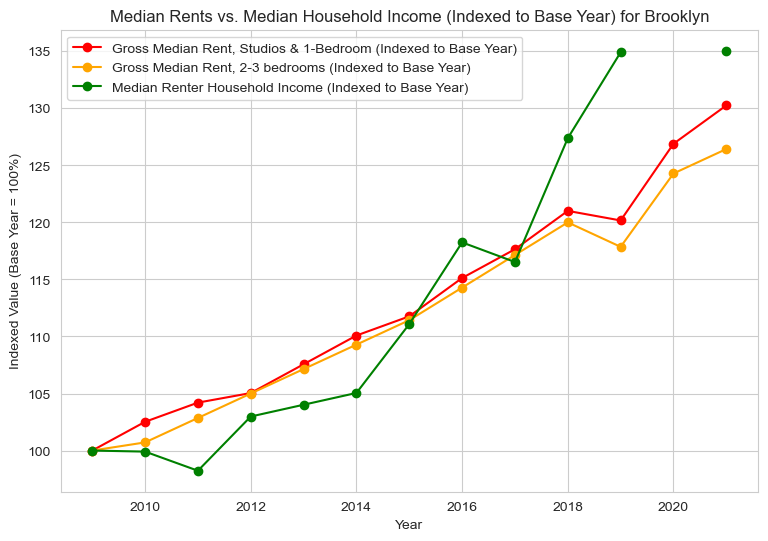

<Figure size 640x480 with 0 Axes>

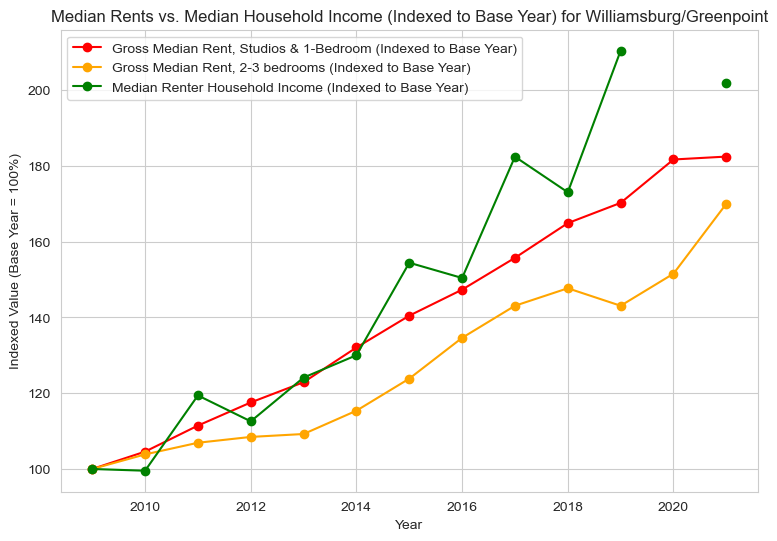

<Figure size 640x480 with 0 Axes>

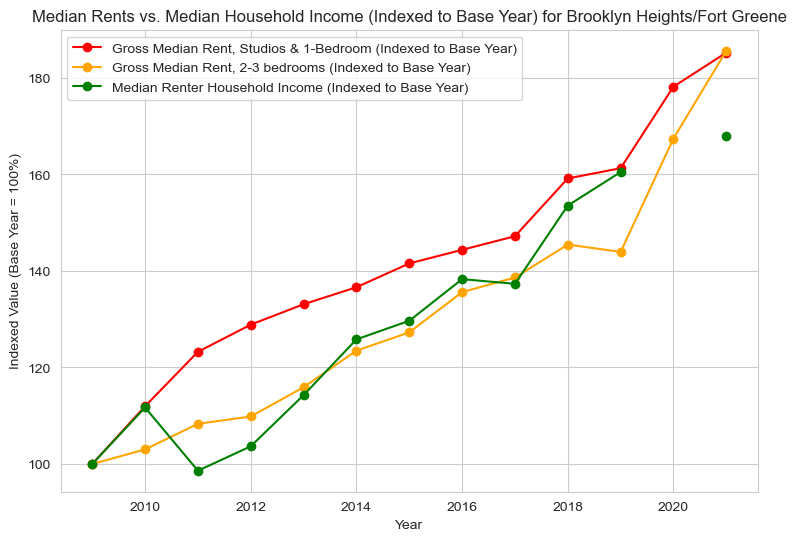

<Figure size 640x480 with 0 Axes>

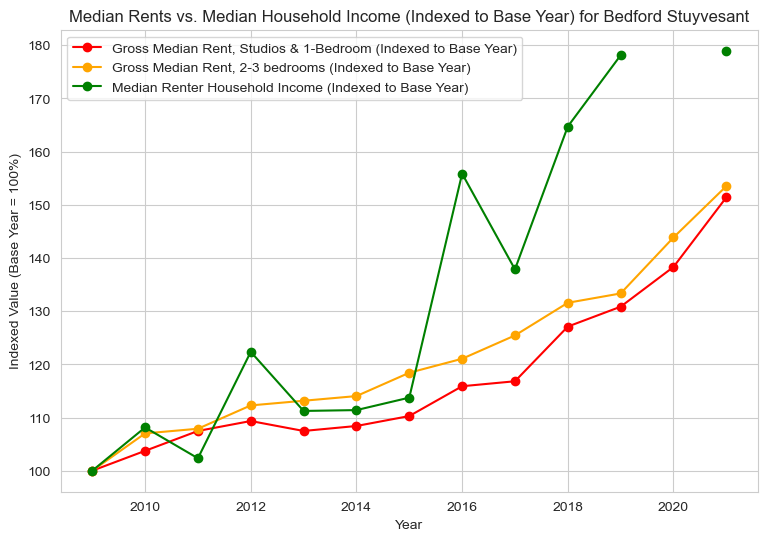

<Figure size 640x480 with 0 Axes>

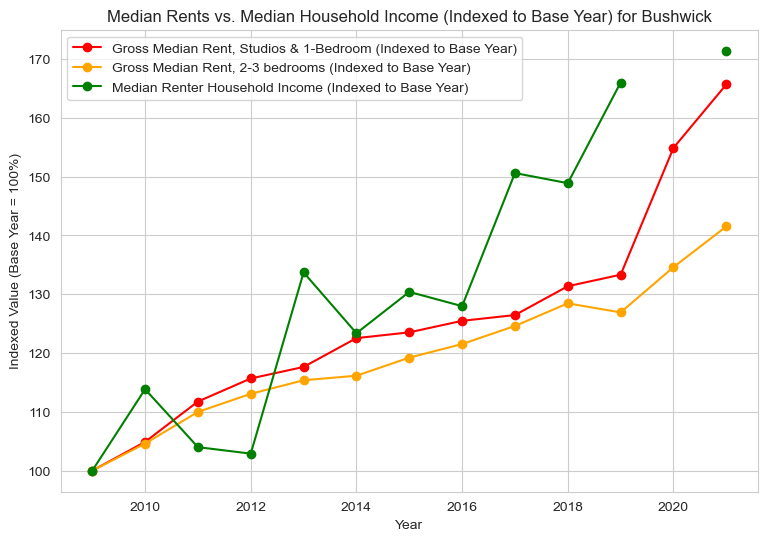

<Figure size 640x480 with 0 Axes>

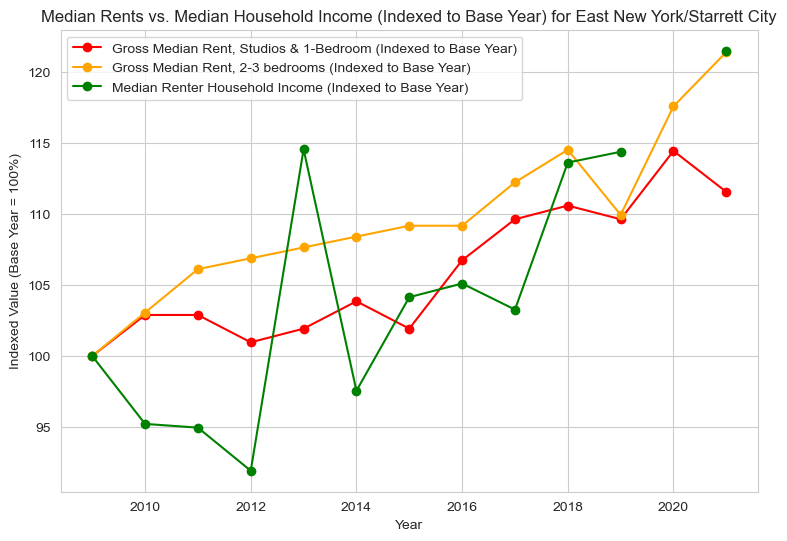

<Figure size 640x480 with 0 Axes>

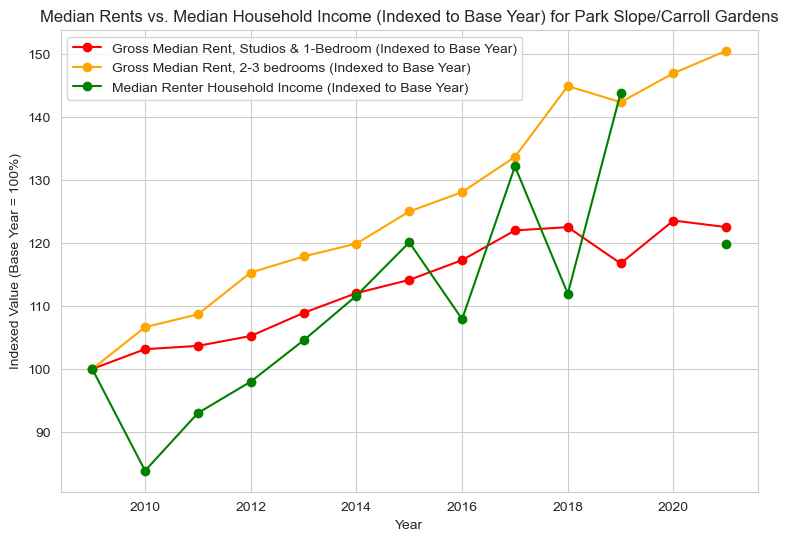

<Figure size 640x480 with 0 Axes>

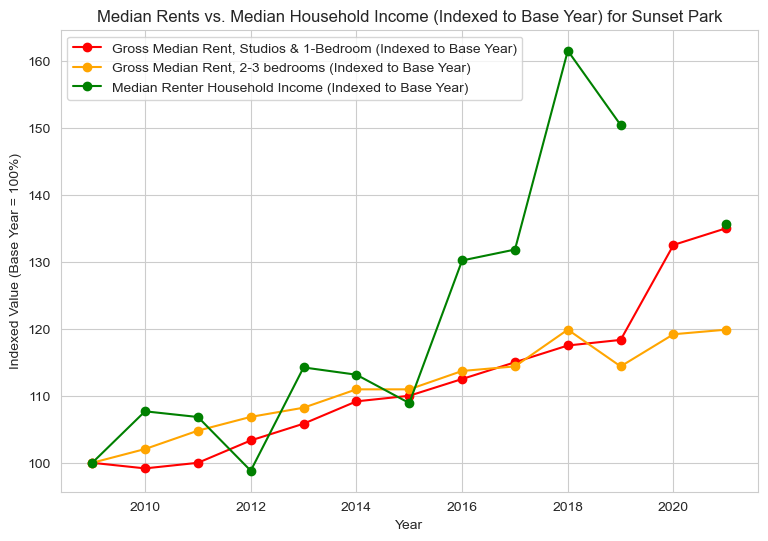

<Figure size 640x480 with 0 Axes>

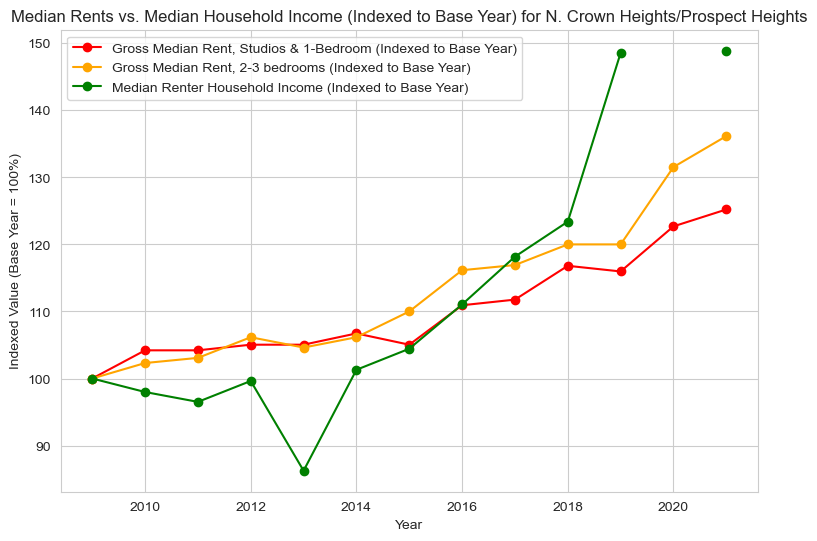

<Figure size 640x480 with 0 Axes>

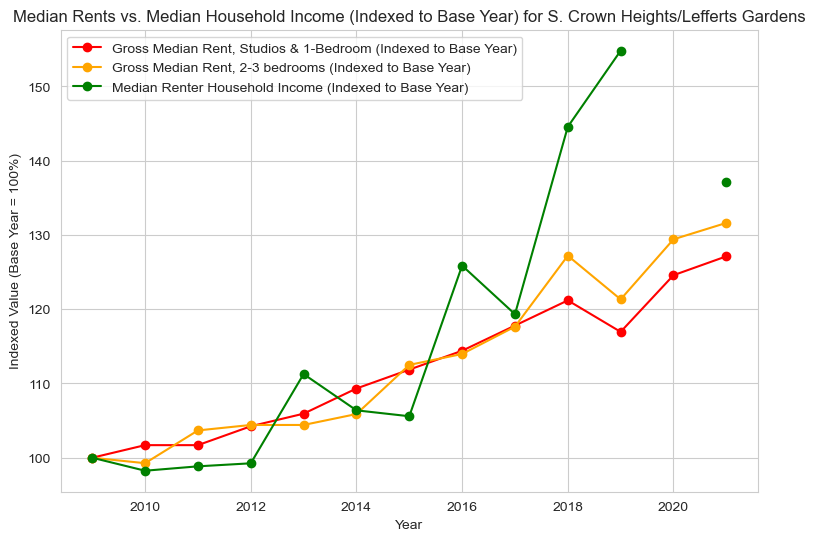

<Figure size 640x480 with 0 Axes>

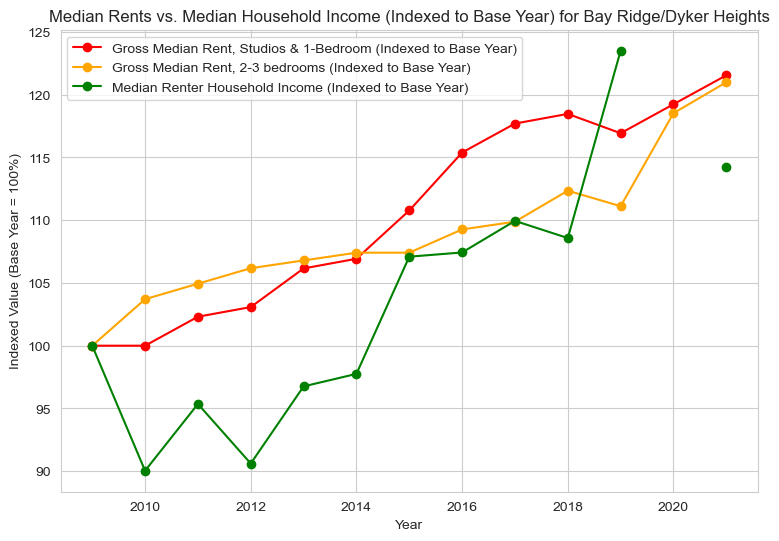

<Figure size 640x480 with 0 Axes>

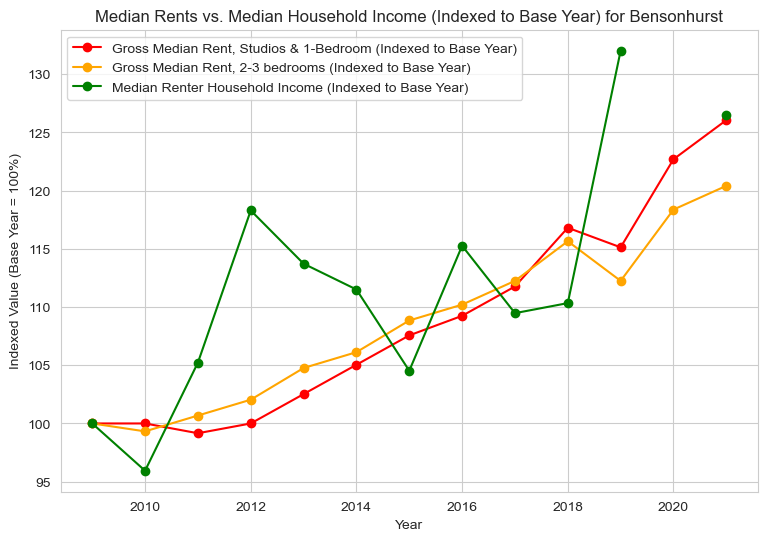

<Figure size 640x480 with 0 Axes>

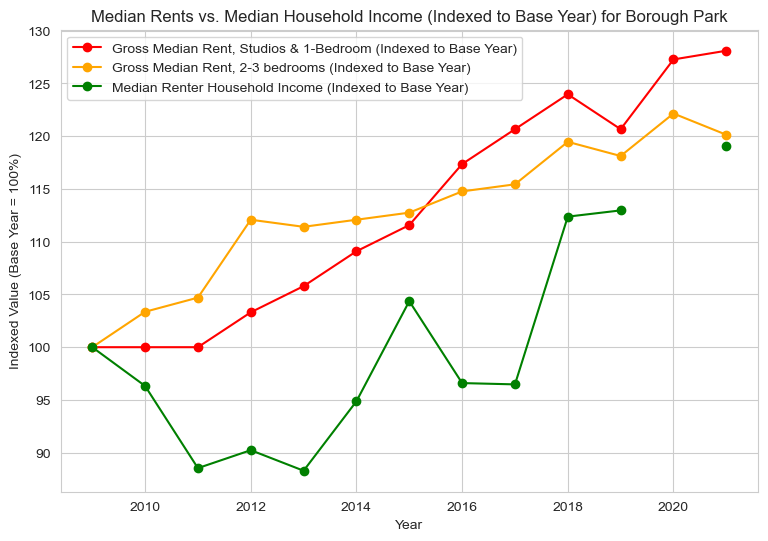

<Figure size 640x480 with 0 Axes>

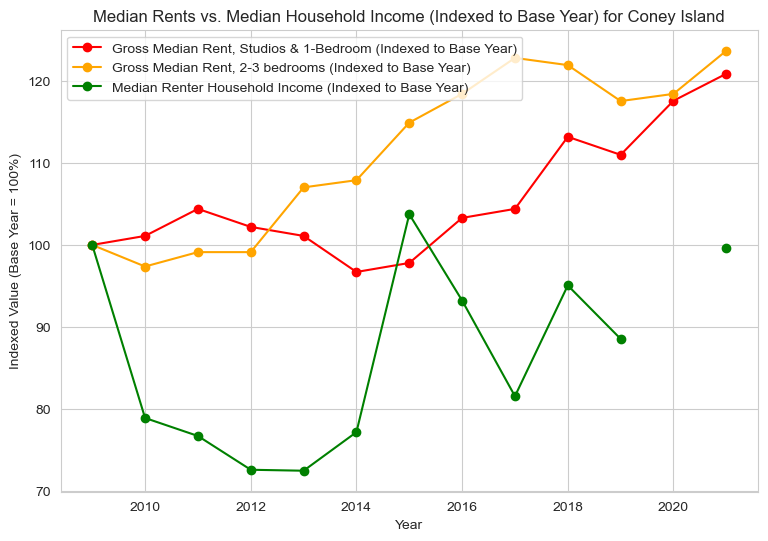

<Figure size 640x480 with 0 Axes>

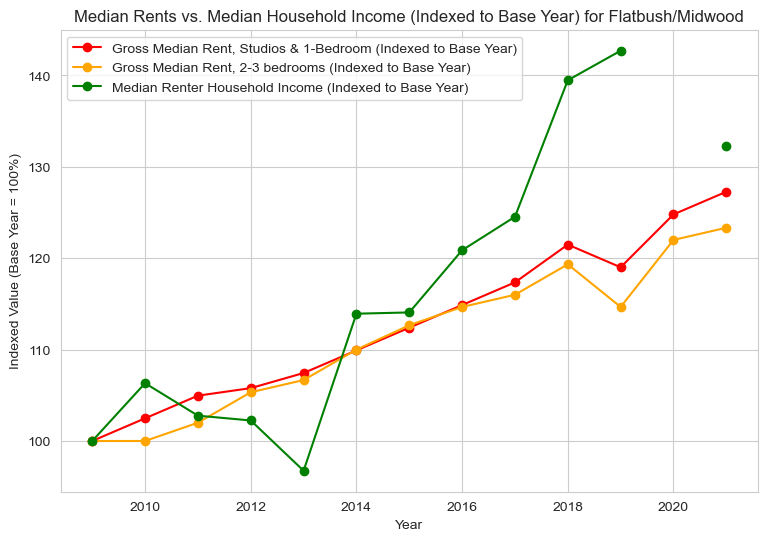

<Figure size 640x480 with 0 Axes>

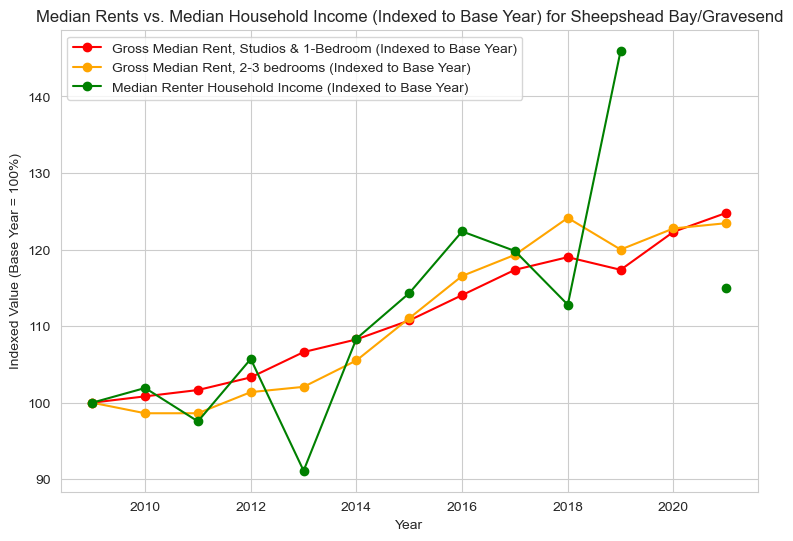

<Figure size 640x480 with 0 Axes>

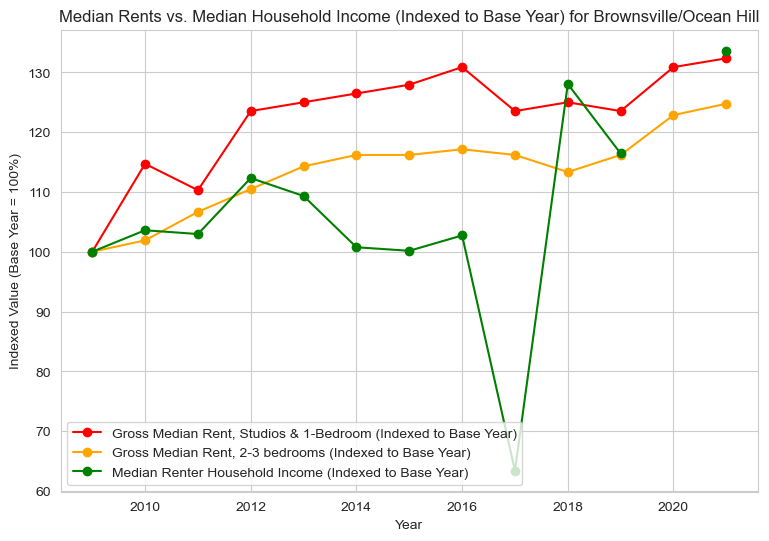

<Figure size 640x480 with 0 Axes>

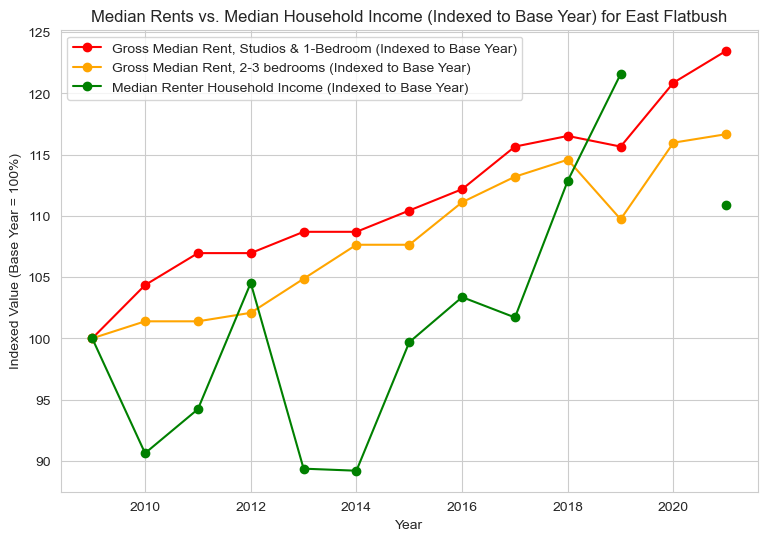

<Figure size 640x480 with 0 Axes>

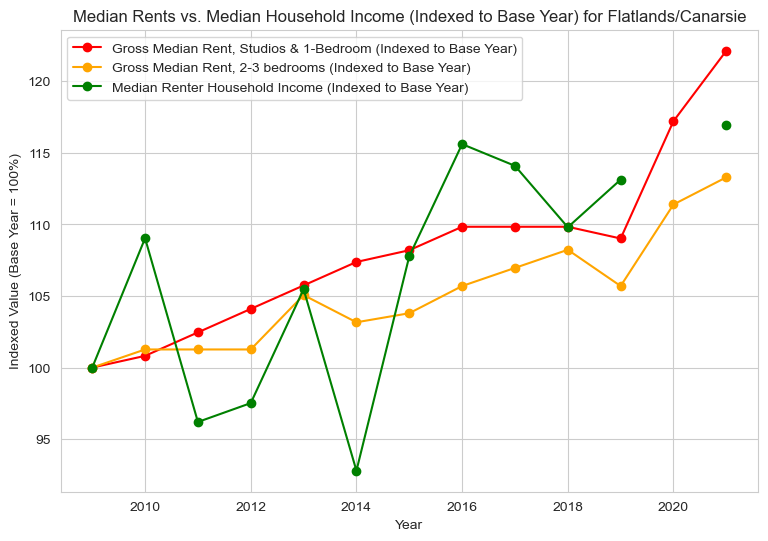

<Figure size 640x480 with 0 Axes>

In [315]:
for i in range(0, furman_data.index.max()+1, 23):
    rent_income_plot(furman_data.iloc[i:i+23])

1. Both rental prices and incomes have been steadily increasing throughout the decade in Brooklyn and in most of the neighborhood.
2. Some areas saw the increase in median rent up to 50-80%, compared to the year 2009. All of all are areas currently under gentrification in the northern part of the borough.
3. There are some inconsistancies in data (see the graph for Brownsville/Ocean Hill), but overall it shows a very clear picture of the ongoing crisis.

### 2. House Price Index
This is the average price changes in repeated sales of the same properties of any type (index=100 in 2000). It is helpfull for understanding the situation with housing availability, given that a medium household income in Brooklyn has increased by 35% since 2009 (see the previous series of graphs for Brooklyn in general).\

Columns:
- hpi

Viz:
- Bar plot

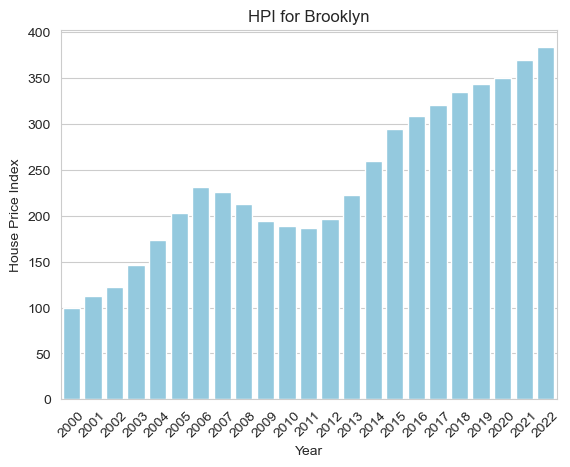

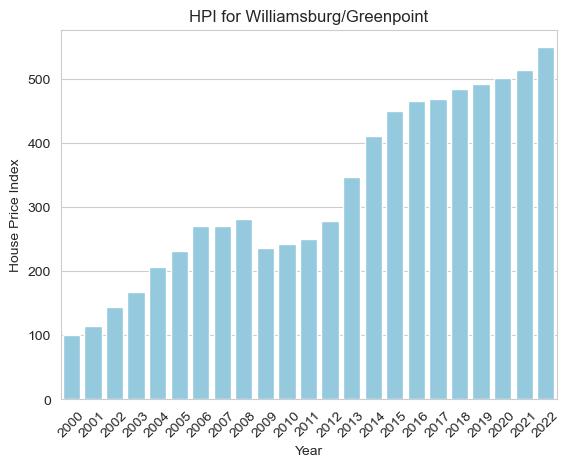

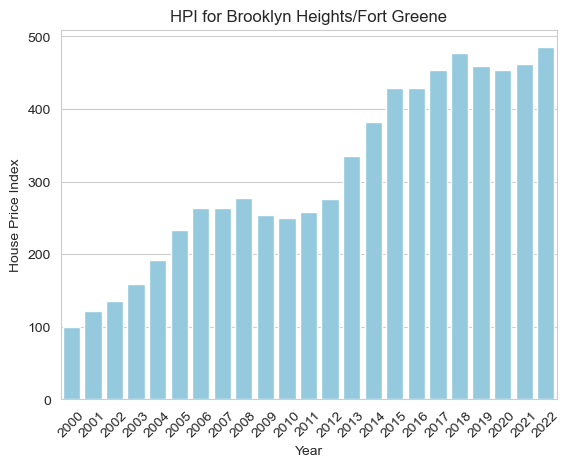

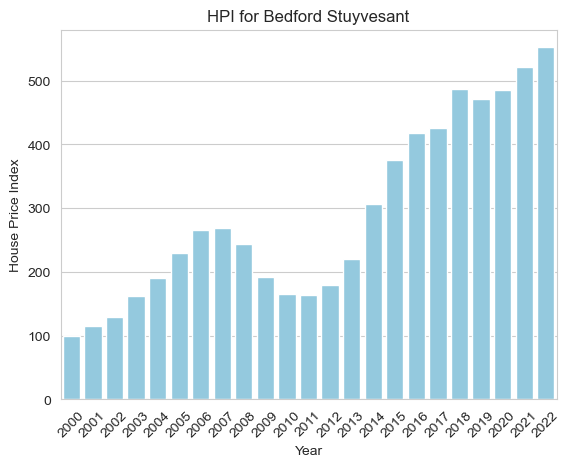

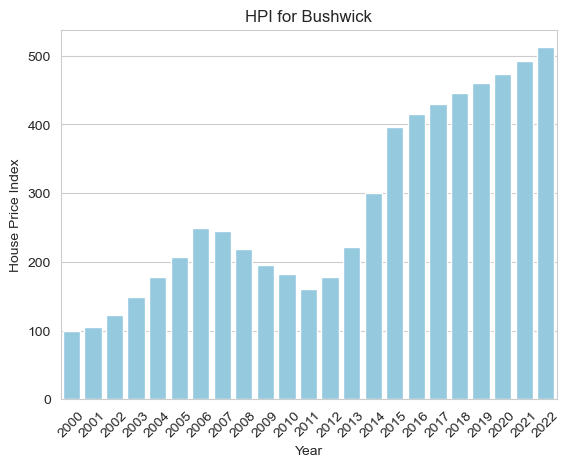

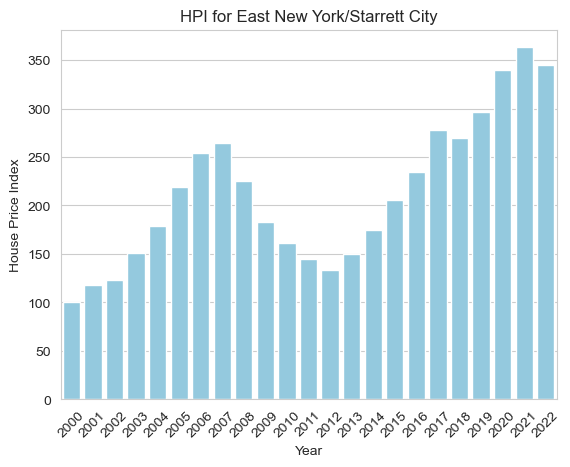

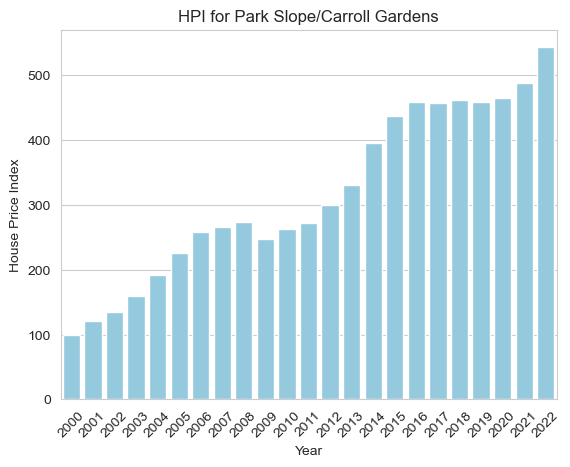

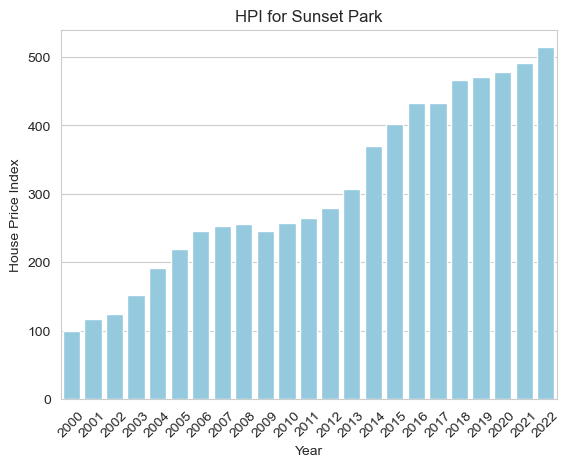

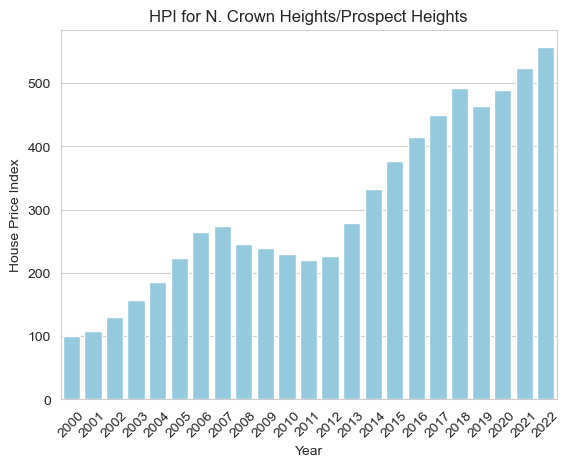

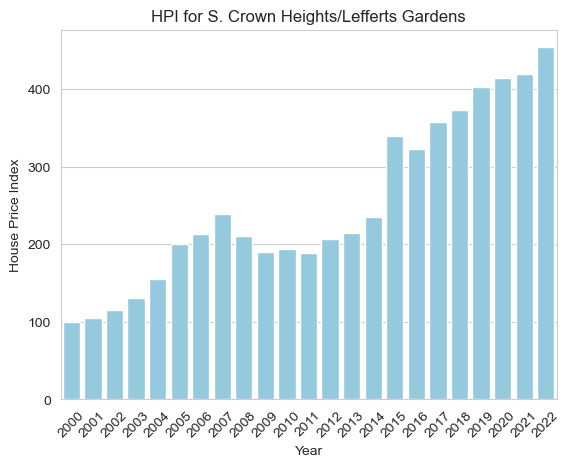

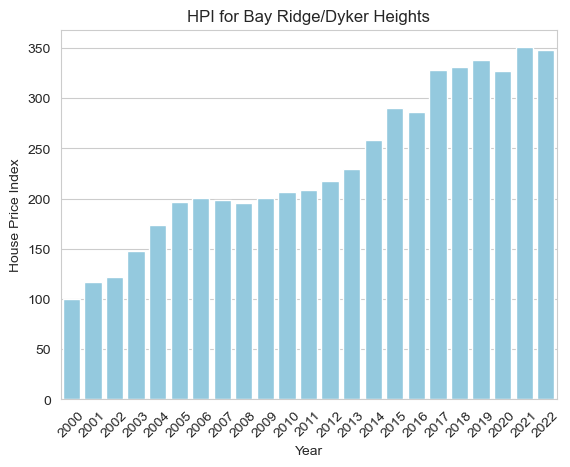

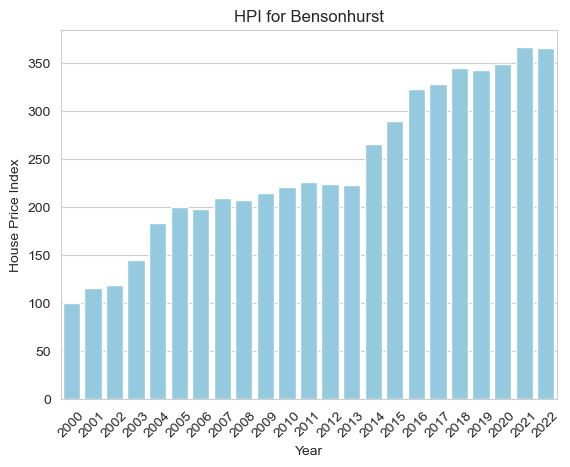

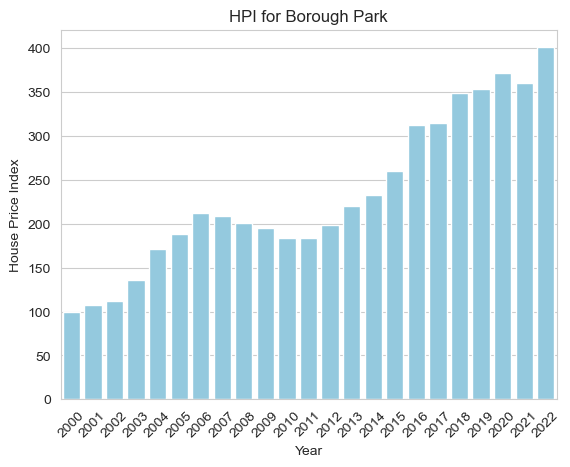

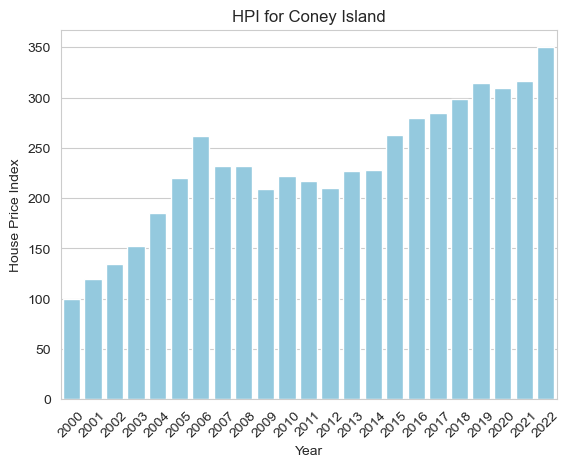

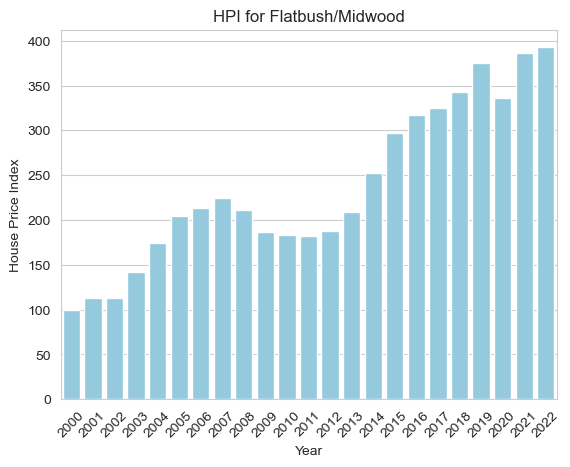

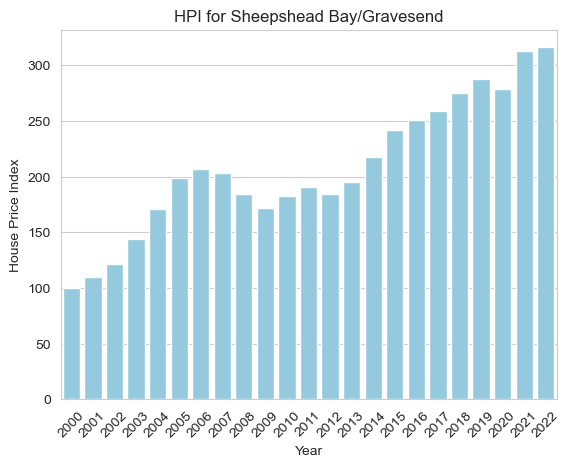

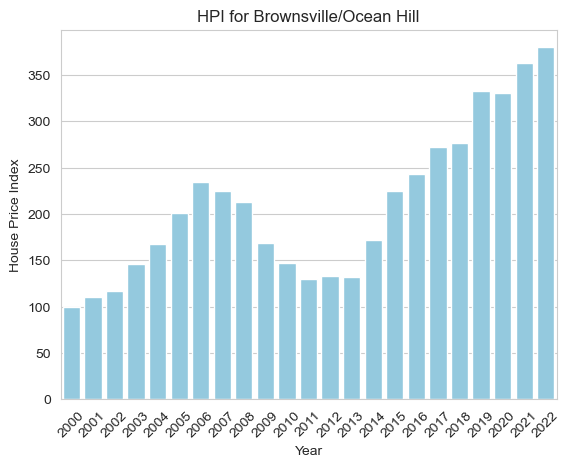

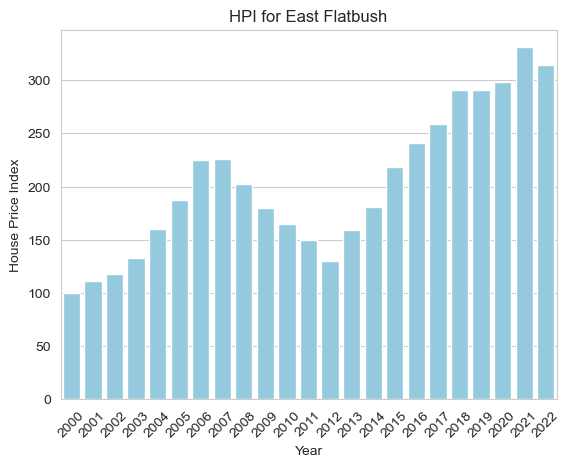

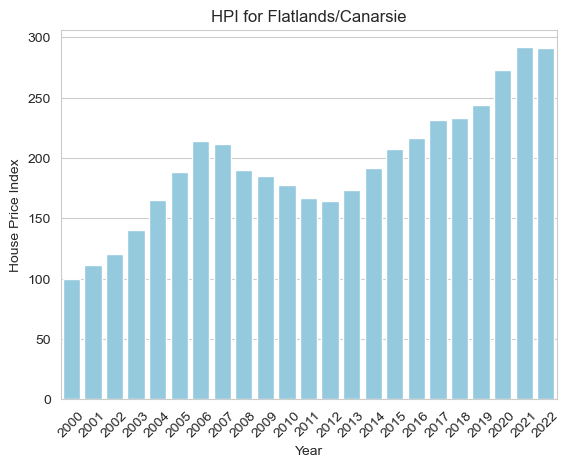

<Figure size 640x480 with 0 Axes>

In [316]:
def hpi_barplot(df):
    sns.set_style("whitegrid")
    ax = sns.barplot(x = "year", y = "hpi", data = df, color="skyblue")
    ax.set(xlabel="Year", ylabel = "House Price Index")
    
    reg_name = df.iloc[0]['region_name']
    plt.title(f'HPI for {reg_name}')
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()

for i in range(0, furman_data.index.max()+1, 23):
    hpi_barplot(furman_data.iloc[i:i+23])

1. Apparently, housing prices have been increasing faster than average incomes.
2. A decrease in prices between 2008 and 2013 for most of the neighborhoods was, most likely, caused by the Great Recession.
3. Prices went up most drastically in the late 2010s.

Let's see a correlation between the HPI statistic and the median gross rent.

### 3. All economic variables correlation (borough-level only).
Viz:
- Heatmap

In [317]:
df = furman_data.loc[furman_data.index < 23, ['median_household_income', 'gross_rent_0_1beds', 'gross_rent_2_3beds', 'median_household_income_own', 'median_household_income_rent', 'hpi']]
df_corr = df.corr()
df_corr

,median_household_income,gross_rent_0_1beds,gross_rent_2_3beds,median_household_income_own,median_household_income_rent,hpi
median_household_income,1.000000,0.915704,0.915878,0.955672,0.982833,0.833058
gross_rent_0_1beds,0.915704,1.000000,0.995739,0.798920,0.946543,0.960435
gross_rent_2_3beds,0.915878,0.995739,1.000000,0.815565,0.938877,0.970569
median_household_income_own,0.955672,0.798920,0.815565,1.000000,0.906736,0.827990
median_household_income_rent,0.982833,0.946543,0.938877,0.906736,1.000000,0.911830
hpi,0.833058,0.960435,0.970569,0.827990,0.911830,1.000000


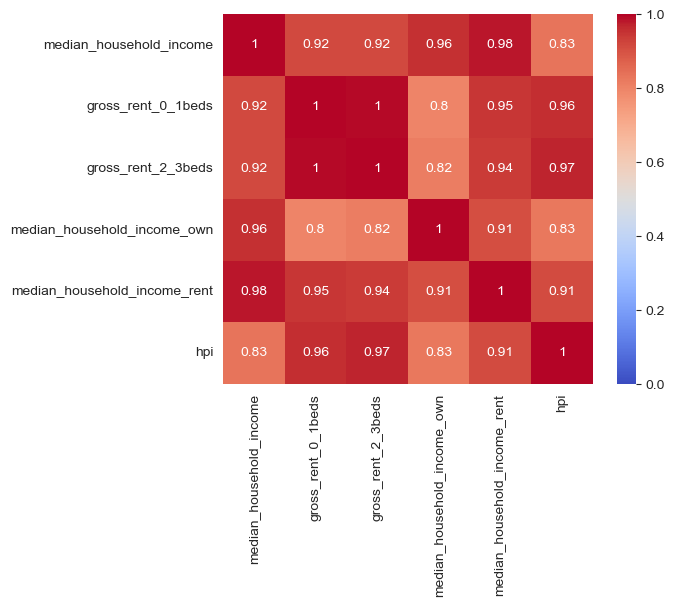

In [318]:
sns.heatmap(df_corr, cmap="coolwarm", annot=True, square=True, vmin=0, vmax=1)
plt.show()

### 4. Homeownership rates (Own v Rent)

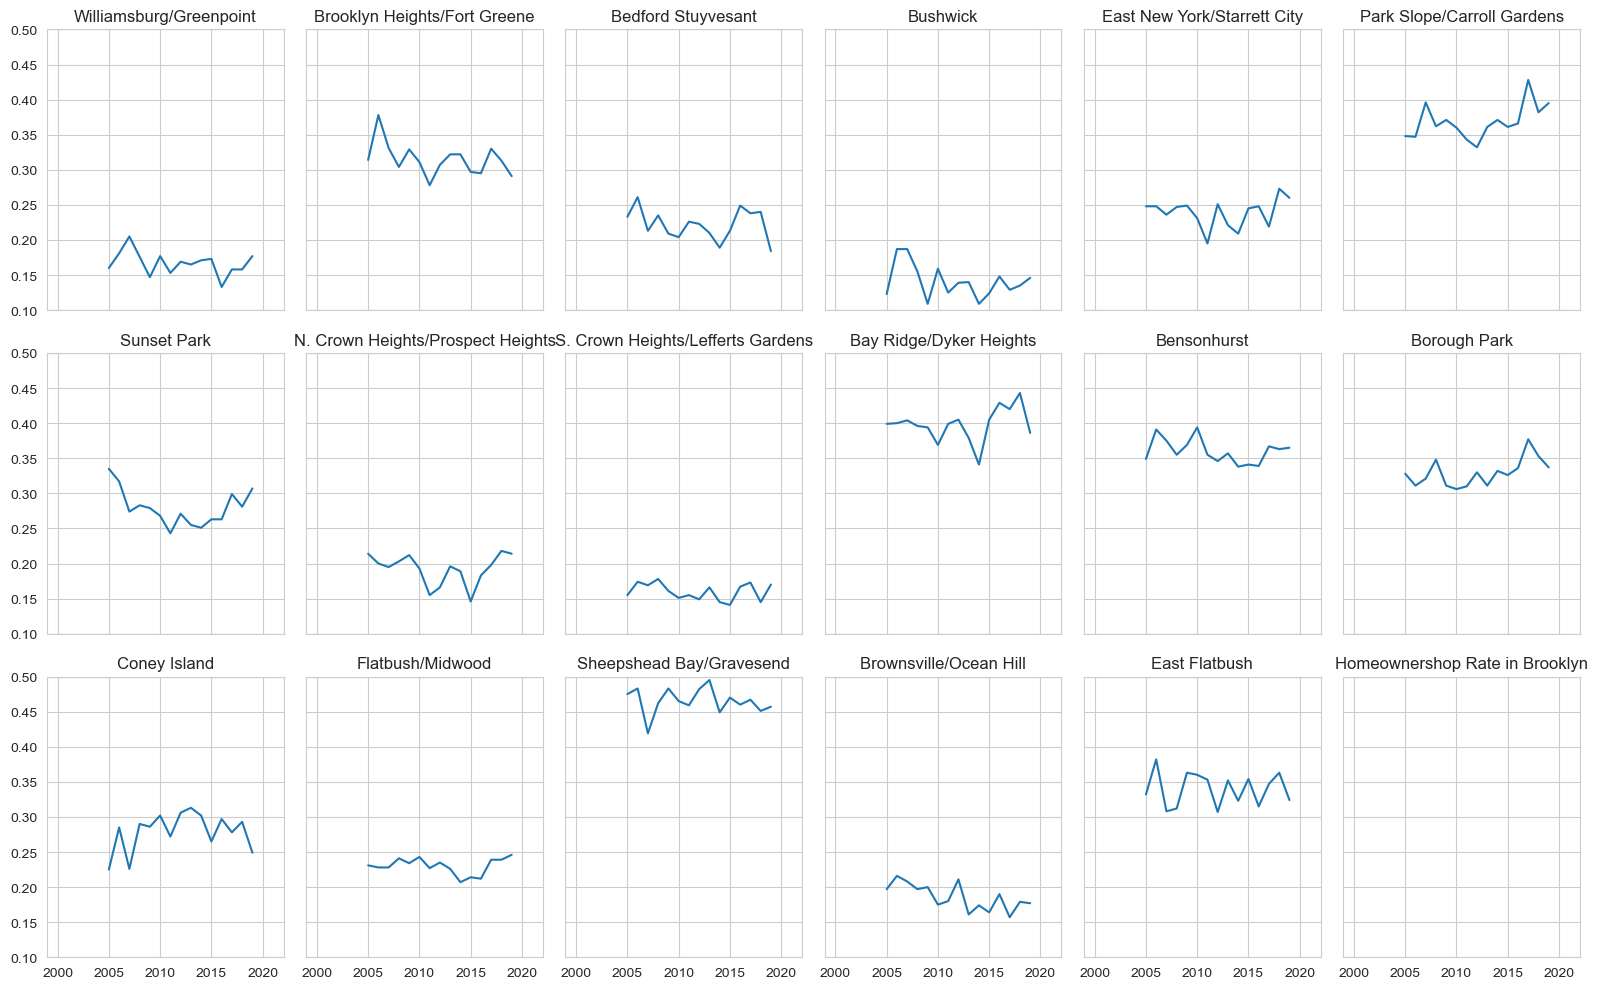

In [324]:
num_plots = 18
rows = 3
cols = 6

# Create figure with 3x6 subplot grid
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10))

# Iterate through subplot axes
for i, ax in enumerate(axs.flat):
    
    # Slice dataframe for each neighborhood 
    start = 23 + i*23
    end = start + 23
    df = furman_data.iloc[start:end]
    
    # Plot just homeownership rate vs year
    ax.plot(df.year, df.homeownership_rate)
    
    # Set title as neighborhood name
    ax.set_title(df.region_name.iloc[0])
    
    # Set y-axis limits
    ax.set_ylim(0.1, 0.5)
    
    # Turn off x/y labels except bottom/left plots
    if i < 12:
        ax.set_xticklabels([])
    if i % 6 != 0:  
        ax.set_yticklabels([])

# Tight layout to fit all plots    
fig.tight_layout()  
plt.title('Homeownershop Rate in Brooklyn')
plt.show()